<a href="https://colab.research.google.com/github/vasanth18062000/cardiovascular/blob/main/newhrflm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#importing dataset

dataset = pd.read_csv('cleveland.csv')
dataset


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


In [ ]:
#feature selection
dataset.columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']
dataset.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

In [ ]:
dataset.where(dataset != '?', np.nan, inplace=True)
dataset['num'] = dataset['num'].map({0: 0, 1: 1, 2: 1, 3: 1, 4: 1})
null_columns = dataset.isna().sum()
for col_name, num_null_values in null_columns.iteritems():
  if (num_null_values != 0):
    dataset[col_name].fillna(dataset[col_name].mode()[0], inplace=True)

X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
dataset=dataset.astype(int)



In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   age       303 non-null    int64
 1   sex       303 non-null    int64
 2   cp        303 non-null    int64
 3   trestbps  303 non-null    int64
 4   chol      303 non-null    int64
 5   fbs       303 non-null    int64
 6   restecg   303 non-null    int64
 7   thalach   303 non-null    int64
 8   exang     303 non-null    int64
 9   oldpeak   303 non-null    int64
 10  slope     303 non-null    int64
 11  ca        303 non-null    int64
 12  thal      303 non-null    int64
 13  num       303 non-null    int64
dtypes: int64(14)
memory usage: 33.3 KB


In [ ]:
dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1,2,3,3,1
2,67,1,4,120,229,0,2,129,1,2,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1,1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1,2,0,7,1
299,68,1,4,144,193,1,0,141,0,3,2,2,7,1
300,57,1,4,130,131,0,0,115,1,1,2,1,7,1
301,57,0,2,130,236,0,2,174,0,0,2,1,3,1


Random Forest Classifier accuracy : 0.8360655737704918


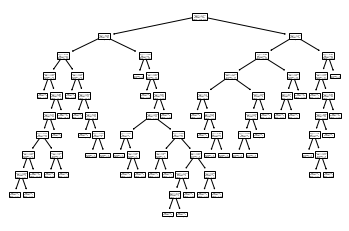

In [ ]:
#RandomForest Classifier

from sklearn.ensemble import RandomForestClassifier
rfClassifier = RandomForestClassifier(random_state = 42,n_estimators=10)
rfClassifier.fit(X_train, y_train)
y_pred_rf = rfClassifier.predict(X_test)
accuracy_rf = accuracy_score(y_pred_rf,y_test)
print("Random Forest Classifier accuracy : "+str(accuracy_rf))

from matplotlib import pyplot as plot
from sklearn import tree
fig=plt.figure()
tree.plot_tree(rfClassifier.estimators_[0])
plot.show()

In [ ]:

print('Confusion Matrix :\n', confusion_matrix(y_test, y_pred_rf))
print()
print('Error Rate       :', (1-(accuracy_rf)))
cm=confusion_matrix(y_test,y_pred_rf)
TN=cm[0,0]
FP=cm[0,1]
FN=cm[1,0]
TP=cm[1,1]
sensitivity=float(TP)/(TP+FN)
print("sensitivity:",sensitivity)
precision=float(TP)/(TP+FP)
print("precision:",precision)
specificity=float(TN)/(TN+FP)
print("specificity",specificity)
print('Classification Report :', classification_report(y_test,y_pred_rf))

Confusion Matrix :
 [[26  3]
 [ 7 25]]

Error Rate       : 0.16393442622950816
sensitivity: 0.78125
precision: 0.8928571428571429
specificity 0.896551724137931
Classification Report :               precision    recall  f1-score   support

           0       0.79      0.90      0.84        29
           1       0.89      0.78      0.83        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



In [ ]:
original = pd.DataFrame(X_test,columns=dataset.columns[0:-1])
y_test.index = original.index
original['num'] = y_test

predicted = pd.DataFrame(X_test,columns=dataset.columns[0:-1])

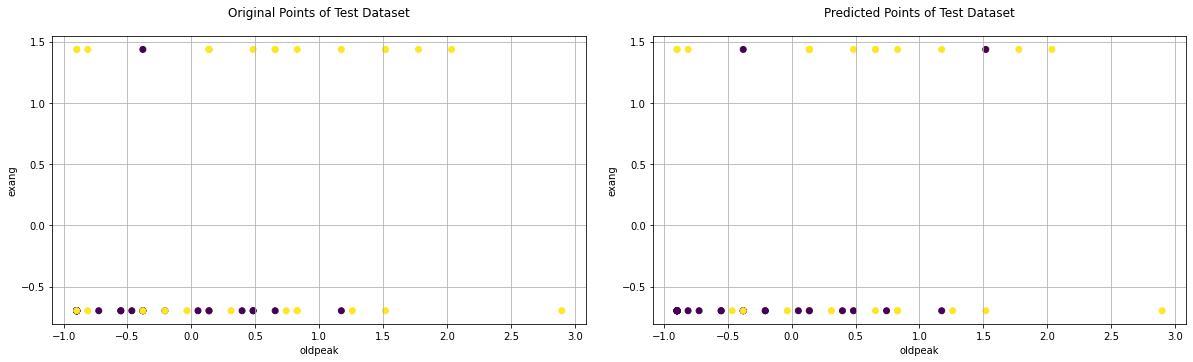

In [ ]:
predicted['num'] = y_pred_rf

plt.subplot(1, 2, 1)
scatter = plt.scatter(x=original.oldpeak, y=original.exang,c=original.num.astype('category').cat.codes)
handler=scatter.legend_elements()[0]
plt.grid()
plt.xlabel("oldpeak")
plt.ylabel("exang")
plt.title("Original Points of Test Dataset",pad = 20)

plt.subplot(1, 2, 2)
scatter = plt.scatter(x=predicted.oldpeak,y=predicted.exang,c=predicted.num.astype('category').cat.codes)
handler=scatter.legend_elements()[0]
plt.grid()
plt.xlabel("oldpeak")
plt.ylabel("exang")
plt.title("Predicted Points of Test Dataset",pad = 20)

plt.subplots_adjust(right=2.75,top=1.123,wspace=0.125)
plt.show()

In [ ]:
#Naive Bayes

from sklearn.naive_bayes import GaussianNB
nbc = GaussianNB()
pred_nbc = nbc.fit(X_train, y_train).predict(X_test)
print("naive bayes:   ",accuracy_score(y_test,pred_nbc))

naive bayes:    0.8360655737704918


In [ ]:
print('Confusion Matrix :\n', confusion_matrix(y_test, pred_nbc))
print()
print('Error Rate       :', (1-(accuracy_score(y_test,pred_nbc))))
cm=confusion_matrix(y_test,pred_nbc)
TN=cm[0,0]
FP=cm[0,1]
FN=cm[1,0]
TP=cm[1,1]
sensitivity=float(TP)/(TP+FN)
print("sensitivity      :",sensitivity)
precision=float(TP)/(TP+FP)
print("precision        :",precision)
specificity=float(TN)/(TN+FP)
print("specificity      :",specificity)
print('Classification Report :', classification_report(y_test,pred_nbc))

Confusion Matrix :
 [[26  3]
 [ 7 25]]

Error Rate       : 0.16393442622950816
sensitivity      : 0.78125
precision        : 0.8928571428571429
specificity      : 0.896551724137931
Classification Report :               precision    recall  f1-score   support

           0       0.79      0.90      0.84        29
           1       0.89      0.78      0.83        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



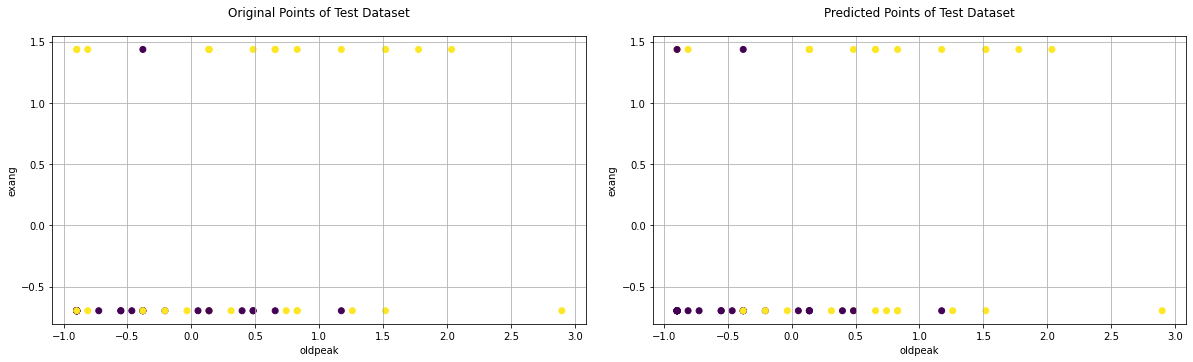

In [ ]:
#For gaussian Naive bayes
predicted['num'] = pred_nbc

plt.subplot(1, 2, 1)
scatter = plt.scatter(x=original.oldpeak, y=original.exang,c=original.num.astype('category').cat.codes)
handler=scatter.legend_elements()[0]
plt.grid()
plt.xlabel("oldpeak")
plt.ylabel("exang")
plt.title("Original Points of Test Dataset",pad = 20)

plt.subplot(1, 2, 2)
scatter = plt.scatter(x=predicted.oldpeak,y=predicted.exang,c=predicted.num.astype('category').cat.codes)
handler=scatter.legend_elements()[0]
plt.grid()
plt.xlabel("oldpeak")
plt.ylabel("exang")
plt.title("Predicted Points of Test Dataset",pad = 20)

plt.subplots_adjust(right=2.75,top=1.123,wspace=0.125)
plt.show()

In [ ]:
#Decision Tree

from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(max_depth=5)
pred_dtc = dtc.fit(X_train, y_train).predict(X_test)
print("decision tree:   ",accuracy_score(y_test,pred_dtc))

decision tree:    0.7377049180327869


In [ ]:
print('Confusion Matrix :\n', confusion_matrix(y_test, pred_dtc))
print()
print('Error Rate       :', (1-(accuracy_score(y_test,pred_dtc))))
cm=confusion_matrix(y_test,pred_dtc)
TN=cm[0,0]
FP=cm[0,1]
FN=cm[1,0]
TP=cm[1,1]
sensitivity=float(TP)/(TP+FN)
print("sensitivity      :",sensitivity)
precision=float(TP)/(TP+FP)
print("precision        :",precision)
specificity=float(TN)/(TN+FP)
print("specificity      :",specificity)
print('Classification Report :', classification_report(y_test,pred_dtc))

Confusion Matrix :
 [[24  5]
 [11 21]]

Error Rate       : 0.2622950819672131
sensitivity      : 0.65625
precision        : 0.8076923076923077
specificity      : 0.8275862068965517
Classification Report :               precision    recall  f1-score   support

           0       0.69      0.83      0.75        29
           1       0.81      0.66      0.72        32

    accuracy                           0.74        61
   macro avg       0.75      0.74      0.74        61
weighted avg       0.75      0.74      0.74        61



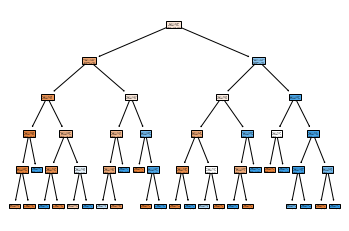

<Figure size 1800x3600 with 0 Axes>

In [ ]:
from sklearn import tree
tree.plot_tree(dtc,filled=True)

plt.figure(figsize=(25,50))
plt.show()

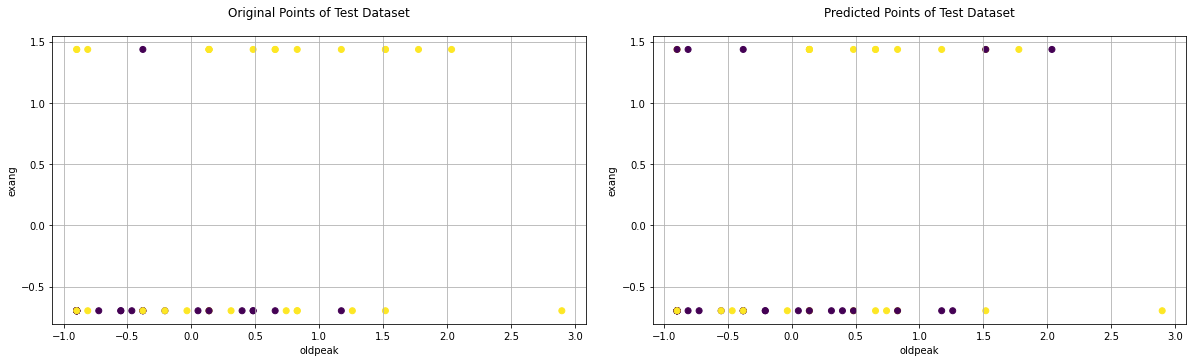

In [ ]:
predicted['num'] = pred_dtc

plt.subplot(1, 2, 1)
scatter = plt.scatter(x=original.oldpeak, y=original.exang,c=original.num.astype('category').cat.codes)
handler=scatter.legend_elements()[0]
plt.grid()
plt.xlabel("oldpeak")
plt.ylabel("exang")
plt.title("Original Points of Test Dataset",pad = 20)

plt.subplot(1, 2, 2)
scatter = plt.scatter(x=predicted.oldpeak,y=predicted.exang,c=predicted.num.astype('category').cat.codes)
handler=scatter.legend_elements()[0]
plt.grid()
plt.xlabel("oldpeak")
plt.ylabel("exang")
plt.title("Predicted Points of Test Dataset",pad = 20)

plt.subplots_adjust(right=2.75,top=1.123,wspace=0.125)
plt.show()

In [ ]:
#SVM linear

from sklearn.svm import SVC
svc_l = SVC(kernel="linear", C=10, gamma=0.1)
pred_svc_l = svc_l.fit(X_train, y_train).predict(X_test)
print("svm linear:   ",accuracy_score(y_test,pred_svc_l))


svm linear:    0.8688524590163934


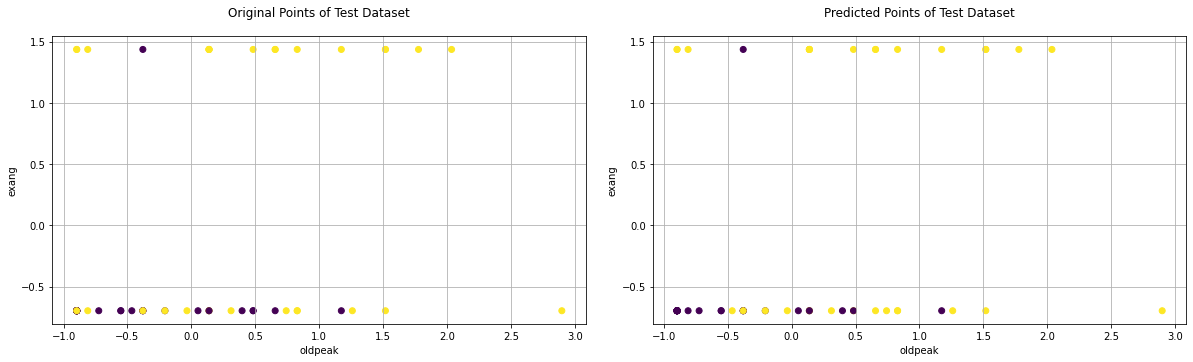

In [ ]:
predicted['num'] = pred_svc_l

plt.subplot(1, 2, 1)
scatter = plt.scatter(x=original.oldpeak, y=original.exang,c=original.num.astype('category').cat.codes)
handler=scatter.legend_elements()[0]
plt.grid()
plt.xlabel("oldpeak")
plt.ylabel("exang")
plt.title("Original Points of Test Dataset",pad = 20)

plt.subplot(1, 2, 2)
scatter = plt.scatter(x=predicted.oldpeak,y=predicted.exang,c=predicted.num.astype('category').cat.codes)
handler=scatter.legend_elements()[0]
plt.grid()
plt.xlabel("oldpeak")
plt.ylabel("exang")
plt.title("Predicted Points of Test Dataset",pad = 20)

plt.subplots_adjust(right=2.75,top=1.123,wspace=0.125)
plt.show()

In [ ]:
print('Confusion Matrix :\n', confusion_matrix(y_test, pred_svc_l))
print()
print('Error Rate       :', (1-(accuracy_score(y_test,pred_svc_l))))
cm=confusion_matrix(y_test,pred_svc_l)
TN=cm[0,0]
FP=cm[0,1]
FN=cm[1,0]
TP=cm[1,1]
sensitivity=float(TP)/(TP+FN)
print("sensitivity      :",sensitivity)
precision=float(TP)/(TP+FP)
print("precision        :",precision)
specificity=float(TN)/(TN+FP)
print("specificity      :",specificity)
print('Classification Report :', classification_report(y_test,pred_svc_l))

Confusion Matrix :
 [[25  4]
 [ 4 28]]

Error Rate       : 0.1311475409836066
sensitivity      : 0.875
precision        : 0.875
specificity      : 0.8620689655172413
Classification Report :               precision    recall  f1-score   support

           0       0.86      0.86      0.86        29
           1       0.88      0.88      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



In [ ]:
#KNN

from sklearn.metrics import accuracy_score, confusion_matrix,classification_report, precision_score, recall_score
from sklearn.neighbors import KNeighborsClassifier
knnClassifier = KNeighborsClassifier(n_neighbors=9)
knnClassifier.fit(X_train,y_train)
#KNeighborsClassifier()


y_pred_knn=knnClassifier.predict(X_test)
accuracy_knn = accuracy_score(y_pred_knn,y_test)
print("KNN accuracy : "+str(accuracy_knn))
y_pred=pd.DataFrame(y_pred_knn)
y_pred

print('Confusion Matrix :', confusion_matrix(y_test, y_pred_knn))
print()
print('Error Rate       :', (1-(accuracy_score(y_test,y_pred_knn))))
cm=confusion_matrix(y_test,y_pred_knn)
TN=cm[0,0]
FP=cm[0,1]
FN=cm[1,0]
TP=cm[1,1]
sensitivity=float(TP)/(TP+FN)
print("sensitivity      :",sensitivity)
precision=float(TP)/(TP+FP)
print("precision        :",precision)
specificity=float(TN)/(TN+FP)
print("specificity      :",specificity)
print('Classification Report :', classification_report(y_test,y_pred_knn))

KNN accuracy : 0.8524590163934426
Confusion Matrix : [[25  4]
 [ 5 27]]

Error Rate       : 0.14754098360655743
sensitivity      : 0.84375
precision        : 0.8709677419354839
specificity      : 0.8620689655172413
Classification Report :               precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



In [ ]:
original = pd.DataFrame(X_test,columns=dataset.columns[0:-1])
y_test.index = original.index
original['num'] = y_test

predicted = pd.DataFrame(X_test,columns=dataset.columns[0:-1])

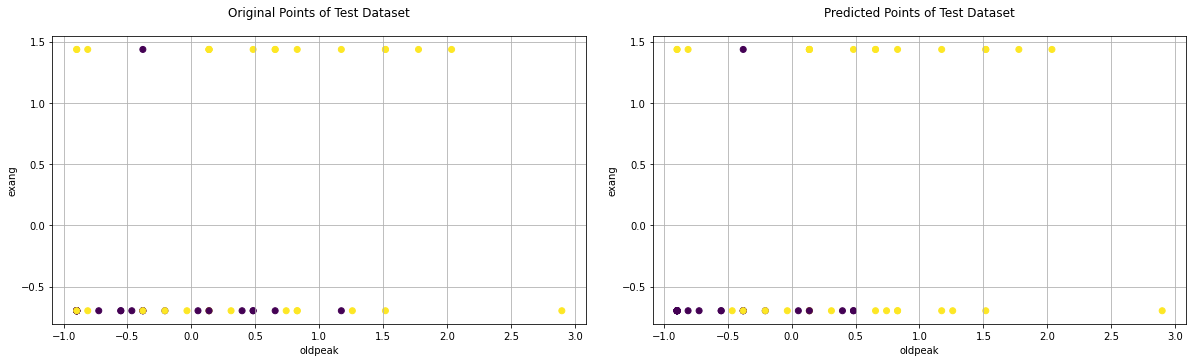

In [ ]:
predicted['num'] = y_pred_knn
plt.subplot(1, 2, 1)
scatter = plt.scatter(x=original.oldpeak, y=original.exang,c=original.num.astype('category').cat.codes)
handler=scatter.legend_elements()[0]
plt.grid()
plt.xlabel("oldpeak")
plt.ylabel("exang")
plt.title("Original Points of Test Dataset",pad = 20)

plt.subplot(1, 2, 2)
scatter = plt.scatter(x=predicted.oldpeak,y=predicted.exang,c=predicted.num.astype('category').cat.codes)
handler=scatter.legend_elements()[0]
plt.grid()
plt.xlabel("oldpeak")
plt.ylabel("exang")
plt.title("Predicted Points of Test Dataset",pad = 20)

plt.subplots_adjust(right=2.75,top=1.123,wspace=0.125)
plt.show()

In [ ]:
#ANN

from tensorflow import keras
from keras import layers
from keras import Sequential
from keras.layers import Dense,Dropout
#Creating a pipeline
model = Sequential()

#1st hidden layer with input layer
model.add(Dense(units=128,activation="relu",input_dim=13))
model.add(Dropout(0.5))

#2nd hidden layer
model.add(Dense(units=64,activation="relu",))
model.add(Dropout(0.25))

#3rd hidden layer
model.add(Dense(units=128,activation="relu",))
model.add(Dropout(0.5))

#4th hidden layer
model.add(Dense(units=64,activation="relu",input_dim=13))
model.add(Dropout(0.25))

#output layer
model.add(Dense(units=1,activation="sigmoid"))
model.add(Dropout(0.5))
model.summary()
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
model_history=model.fit(X_train,y_train,validation_split=0.2,epochs=1000, batch_size=10,verbose=0)

y_pred_ann = model.predict(X_test)
y_pred_ann = (y_pred_ann > 0.5)
accuracy_ann=accuracy_score(y_pred_ann, y_test)
print("ANN accuracy : "+str(accuracy_ann))

print('Confusion Matrix :', confusion_matrix(y_test, y_pred_ann))
print('Error Rate       :', (1-(accuracy_score(y_test,y_pred_ann))))
cm=confusion_matrix(y_test,y_pred_ann)
TN=cm[0,0]
FP=cm[0,1]
FN=cm[1,0]
TP=cm[1,1]
sensitivity=float(TP)/(TP+FN)
print("sensitivity      :",sensitivity)
precision=float(TP)/(TP+FP)
print("precision        :",precision)
specificity=float(TN)/(TN+FP)
print("specificity      :",specificity)
print('Classification Report :', classification_report(y_test,y_pred_ann))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1792      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 128)               8320      
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 64)                8

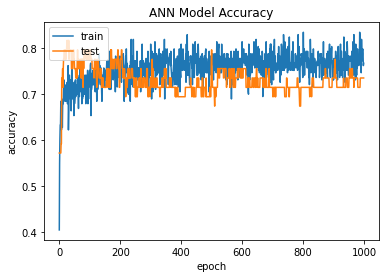

In [ ]:
# summarize history for accuracy of ANN
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('ANN Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

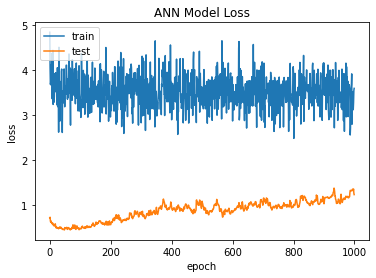

In [ ]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('ANN Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
#ANN output

'''ann_test_loss, ann_test_accuracy = model.evaluate(X_test, y_test,verbose=0)
print("Accuracy score for ANN = {}".format(ann_test_accuracy))'''

'ann_test_loss, ann_test_accuracy = model.evaluate(X_test, y_test,verbose=0)\nprint("Accuracy score for ANN = {}".format(ann_test_accuracy))'

In [ ]:
#HRFLM

from copy import deepcopy
from sklearn.metrics import mean_squared_error
class ModelTree(object):
    def __init__(self, model, max_depth=5, min_samples_leaf=10):
        self.model = model
        self.max_depth = max_depth
        self.min_samples_leaf = min_samples_leaf
        self.tree = None
    def fit(self, X, y, verbose=False):
        # Settings
        model = self.model
        min_samples_leaf = self.min_samples_leaf
        max_depth = self.max_depth
        if verbose:
            print(" max_depth={}, min_samples_leaf={}...".format(max_depth, min_samples_leaf))
        def _build_tree(X, y):
            global index_node_global
            def _create_node(X, y, depth, container):
                loss_node, model_node = _fit_model(X, y, model)
                node = {"name": "node",
                        "index": container["index_node_global"],
                        "loss": loss_node,
                        "model": model_node,
                        "data": (X, y),
                        "n_samples": len(X),
                        "j_feature": None,
                        "threshold": None,
                        "children": {"left": None, "right": None},
                        "depth": depth}
                container["index_node_global"] += 1
                return node
            # Recursively split node + traverse node until a terminal node is reached
            def _split_traverse_node(node, container):
                # Perform split and collect result
                result = _splitter(node, model, max_depth=max_depth,min_samples_leaf=min_samples_leaf)
                # Return terminal node if split is not advised
                if not result["did_split"]:
                    if verbose:
                        depth_spacing_str = " ".join([" "] * node["depth"])
                        print(" {}*leaf {} @ depth {}: loss={:.6f}, N={}".format(depth_spacing_str, node["index"], node["depth"], node["loss"], result["N"]))
                    return

                # Update node information based on splitting result
                node["j_feature"] = result["j_feature"]
                node["threshold"] = result["threshold"]
                del node["data"]  # delete node stored data

                # Extract splitting results
                (X_left, y_left), (X_right, y_right) = result["data"]
                model_left, model_right = result["models"]

                # Report created node to user
                if verbose:
                    depth_spacing_str = " ".join([" "] * node["depth"])
                    print(" {}node {} @ depth {}: loss={:.6f}, j_feature={}, threshold={:.6f}, N=({},{})".format(depth_spacing_str, node["index"], node["depth"], node["loss"], node["j_feature"], node["threshold"], len(X_left), len(X_right)))

                # Create children nodes
                node["children"]["left"] = _create_node(X_left, y_left, node["depth"]+1, container)
                node["children"]["right"] = _create_node(X_right, y_right, node["depth"]+1, container)
                node["children"]["left"]["model"] = model_left
                node["children"]["right"]["model"] = model_right

                # Split nodes
                _split_traverse_node(node["children"]["left"], container)
                _split_traverse_node(node["children"]["right"], container)

            container = {"index_node_global": 0}  # mutatable container
            root = _create_node(X, y, 0, container)  # depth 0 root node
            _split_traverse_node(root, container)  # split and traverse root node

            return root

        # Construct tree
        self.tree = _build_tree(X, y)
        return self.tree
    # ======================
    # Predict
    # ======================
    def predict(self, X):
        assert self.tree is not None
        def _predict(node, x):
            no_children = node["children"]["left"] is None and \
                          node["children"]["right"] is None
            if no_children:
                y_pred_x = node["model"].predict([x])[0]
                return y_pred_x
            else:
                if x[node["j_feature"]] <= node["threshold"]:  # x[j] < threshold
                    return _predict(node["children"]["left"], x)
                else:  # x[j] > threshold
                    return _predict(node["children"]["right"], x)
        y_pred = np.array([_predict(self.tree, x) for x in X])
        return y_pred
    # ======================
    # Loss
    # ======================
    def loss(self, X, y, y_pred):
        loss = self.model.loss(X, y, y_pred)
        return loss
def _splitter(node, model,max_depth=5, min_samples_leaf=10):
    # Extract data
    X, y = node["data"]
    depth = node["depth"]
    N, d = X.shape

    # Find feature splits that might improve loss
    did_split = False
    loss_best = node["loss"]
    data_best = None
    models_best = None
    j_feature_best = None
    threshold_best = None

    # Perform threshold split search only if node has not hit max depth
    if (depth >= 0) and (depth < max_depth):
        for j_feature in range(d):
            threshold_search = []
            for i in range(N):
                threshold_search.append(X[i, j_feature])
            # Perform threshold split search on j_feature
            for threshold in threshold_search:
                # Split data based on threshold
                (X_left, y_left), (X_right, y_right) = _split_data(j_feature, threshold, X, y)
                N_left, N_right = len(X_left), len(X_right)

                # Splitting conditions
                split_conditions = [N_left >= min_samples_leaf,
                                    N_right >= min_samples_leaf]

                # Do not attempt to split if split conditions not satisfied
                if not all(split_conditions):
                    continue

                # Compute weight loss function
                loss_left, model_left = _fit_model(X_left, y_left, model)
                loss_right, model_right = _fit_model(X_right, y_right, model)
                loss_split = (N_left*loss_left + N_right*loss_right) / N

                # Update best parameters if loss is lower
                if loss_split < loss_best:
                    did_split = True
                    loss_best = loss_split
                    models_best = [model_left, model_right]
                    data_best = [(X_left, y_left), (X_right, y_right)]
                    j_feature_best = j_feature
                    threshold_best = threshold

    # Return the best result
    result = {"did_split": did_split,
              "loss": loss_best,
              "models": models_best,
              "data": data_best,
              "j_feature": j_feature_best,
              "threshold": threshold_best,
              "N": N}

    return result

def _fit_model(X, y, model):
    model_copy = deepcopy(model)  # must deepcopy the model!
    model_copy.fit(X,y)
    y_pred = model_copy.predict(X)
    loss = model_copy.loss(X, y, y_pred)
    assert loss >= 0.0
    return loss, model_copy

def _split_data(j_feature, threshold, X, y):
    idx_left = np.where(X[:, j_feature] <= threshold)[0]
    idx_right = np.delete(np.arange(0, len(X)), idx_left)
    assert len(idx_left) + len(idx_right) == len(X)
    idx_left_bool = [False for i in X]
    idx_right_bool = [False for i in X]
    for i in idx_left:
      idx_left_bool[i] = True
    for i in idx_right:
      idx_right_bool[i] = True
    return (X[idx_left_bool], y[idx_left_bool]), (X[idx_right_bool], y[idx_right_bool])

class logistic_regr:

    def __init__(self):
        from sklearn.linear_model import LogisticRegression
        self.model = LogisticRegression(penalty="l2",solver='liblinear')
        self.flag = False
        self.flag_y_pred = None

    def fit(self, X, y):
        y_unique = list(set(y))
        if len(y_unique) == 1:
            self.flag = True
            self.flag_y_pred = y_unique[0]
        else:
            self.model.fit(X, y)

    def predict(self, X):
        if self.flag:
            return self.flag_y_pred * np.ones((len(X),), dtype=int)
        else:
            return self.model.predict(X)

    def loss(self, X, y, y_pred):
        return mean_squared_error(y, y_pred)

    def predict_proba(self,X):
        return self.model.predict_proba(X)


#No of decisioin Trees
esitmators=5
pred_HRFLM=[]
n_train_split=int(len(X_train)/esitmators)
inital_train=0
final_train=0
yy_pred=[]
classifier=None
for i in range(1,esitmators+1):
    classifier =logistic_regr()
    final_train=i*n_train_split
    temp_X_train=X_train[inital_train:final_train]
    temp_y_train=y_train[inital_train:final_train]
    L=ModelTree(classifier,max_depth=20, min_samples_leaf=10)
    node=L.fit(temp_X_train,temp_y_train,verbose=False)
    classifier=node["model"]
    y_pred_temp=L.predict(X_test)
    yy_pred.append(y_pred_temp)
for j in range(len(yy_pred[0])):
    curr=[]
    for i in range(len(yy_pred)):
        curr.append(yy_pred[i][j])
    a=curr.count(0)
    b=curr.count(1)
    if a>b:
        pred_HRFLM.append(0)
    else:
        pred_HRFLM.append(1)

In [ ]:
#HRFLM output

print ("HRFLM:                ", accuracy_score(y_test, pred_HRFLM))

HRFLM:                 0.8852459016393442


In [ ]:
print('Confusion Matrix :', confusion_matrix(y_test,pred_HRFLM))
print()
print('ERROR RATE       :',(1-accuracy_score(y_test, pred_HRFLM)))
cm=confusion_matrix(y_test,pred_HRFLM)
TN=cm[0,0]
FP=cm[0,1]
FN=cm[1,0]
TP=cm[1,1]
sensitivity=float(TP)/(TP+FN)
print("sensitivity      :",sensitivity)
precision=float(TP)/(TP+FP)
print("precision        :",precision)
specificity=float(TN)/(TN+FP)
print("specificity      :",specificity)
print('Classification Report :', classification_report(y_test,pred_HRFLM))

Confusion Matrix : [[26  3]
 [ 4 28]]

ERROR RATE       : 0.11475409836065575
sensitivity      : 0.875
precision        : 0.9032258064516129
specificity      : 0.896551724137931
Classification Report :               precision    recall  f1-score   support

           0       0.87      0.90      0.88        29
           1       0.90      0.88      0.89        32

    accuracy                           0.89        61
   macro avg       0.88      0.89      0.89        61
weighted avg       0.89      0.89      0.89        61



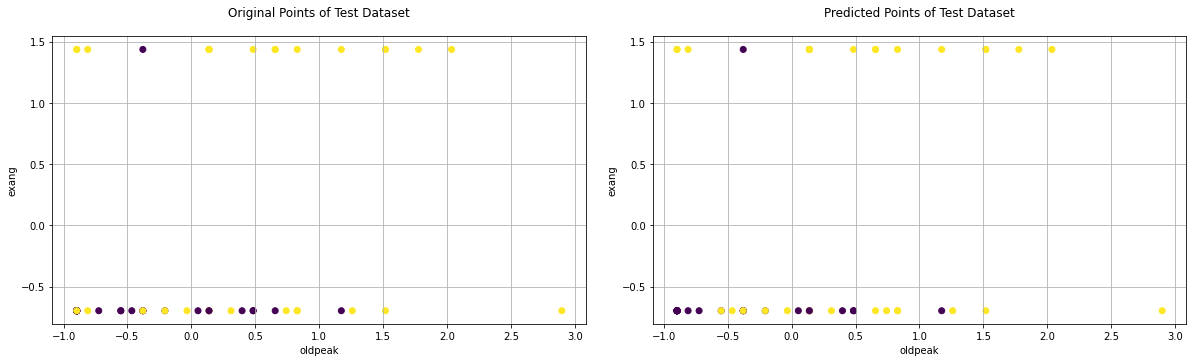

In [ ]:
predicted['num'] = pred_HRFLM

plt.subplot(1, 2, 1)
scatter = plt.scatter(x=original.oldpeak, y=original.exang,c=original.num.astype('category').cat.codes)
handler=scatter.legend_elements()[0]
plt.grid()
plt.xlabel("oldpeak")
plt.ylabel("exang")
plt.title("Original Points of Test Dataset",pad = 20)

plt.subplot(1, 2, 2)
scatter = plt.scatter(x=predicted.oldpeak,y=predicted.exang,c=predicted.num.astype('category').cat.codes)
handler=scatter.legend_elements()[0]
plt.grid()
plt.xlabel("oldpeak")
plt.ylabel("exang")
plt.title("Predicted Points of Test Dataset",pad = 20)

plt.subplots_adjust(right=2.75,top=1.123,wspace=0.125)
plt.show()

In [ ]:
#Result

accuracy = [accuracy_knn, accuracy_score(y_test,pred_dtc), accuracy_score(y_test,pred_svc_l),accuracy_rf,accuracy_score(y_test,pred_nbc),accuracy_ann,accuracy_score(y_test, pred_HRFLM)]
models = ["K-Nearest Neighbors","Decision Tree","Support Vector Machine","Random Forest","Naive Bayes","ANN","HRFLM"]

for i in range(len(models)):
    print("The achieved accuracy of "+models[i]+" is: "+str(accuracy[i]))

The achieved accuracy of K-Nearest Neighbors is: 0.8524590163934426
The achieved accuracy of Decision Tree is: 0.7377049180327869
The achieved accuracy of Support Vector Machine is: 0.8688524590163934
The achieved accuracy of Random Forest is: 0.8360655737704918
The achieved accuracy of Naive Bayes is: 0.8360655737704918
The achieved accuracy of ANN is: 0.8032786885245902
The achieved accuracy of HRFLM is: 0.8852459016393442


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Accuracy')

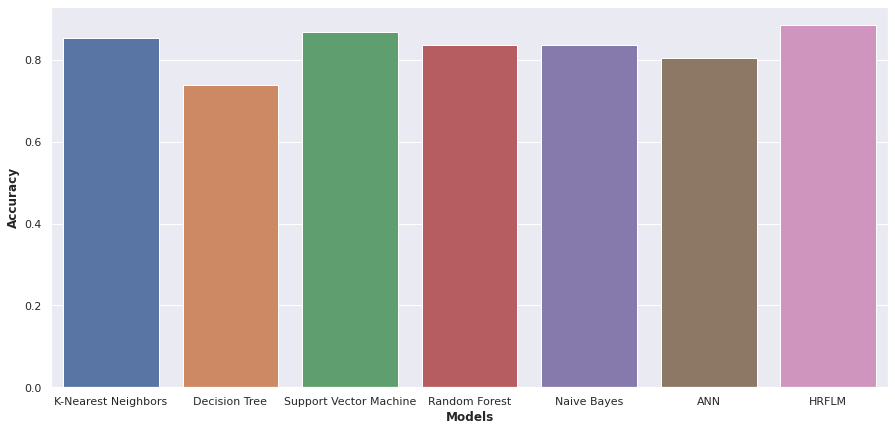

In [ ]:
sns.set(rc={'figure.figsize':(15,7)})
sns.barplot(models,accuracy)
plt.xlabel("Models", fontweight="bold")
plt.ylabel("Accuracy", fontweight="bold")

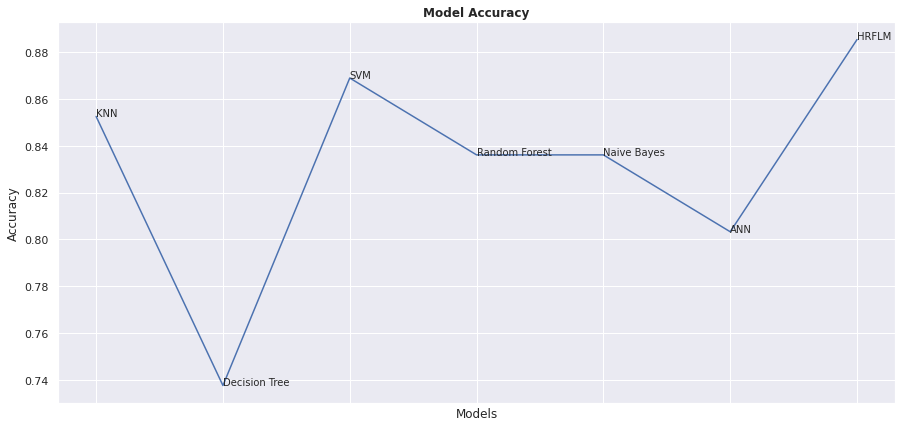

In [ ]:

plt.rcParams["font.size"] = 10

plt.plot(accuracy)
accuracy = list(enumerate(accuracy))
plt.annotate("KNN", accuracy[0])
plt.annotate("Decision Tree", accuracy[1])

plt.annotate("SVM", accuracy[2])
plt.annotate("Random Forest", accuracy[3])
plt.annotate("Naive Bayes", accuracy[4])
plt.annotate("ANN", accuracy[5])
plt.annotate("HRFLM",accuracy[6])


plt.tick_params(bottom=False, labelbottom=False)
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Model Accuracy", fontweight="bold")

plt.show()